# Are players named Juan better than players named John?
And if so, is it because of their name?

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats
import seaborn as sns

## Barchart of average number of hits per year

In [2]:
people = pd.read_csv('People.csv')
people = people[['playerID', 'nameFirst', 'nameLast']]
batting = pd.read_csv('Batting.csv')
batting = batting[['playerID', 'AB', 'H', 'HR', 'yearID']]


In [3]:
playerHits = people.join(batting.set_index('playerID'), on='playerID')

In [7]:
johnjuan = playerHits[playerHits.nameFirst.isin(['Juan','John']) ]

In [21]:
juan = johnjuan[johnjuan.nameFirst=='Juan'].reset_index()
john = johnjuan[johnjuan.nameFirst=='John'].reset_index()

group = johnjuan.groupby('nameFirst').agg({'nameFirst':'first', 'H':'mean'})
#group.columns = ['nameFirst', 'H']
group
#plt.figure()
#sns.barploy(data=johnjuan, x='nameFirst', y='')

,nameFirst,H
nameFirst,,
John,John,28.043810
Juan,Juan,37.161644


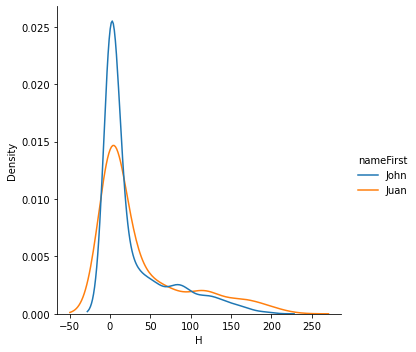

In [14]:
sns.displot(data=johnjuan, x='H', hue='nameFirst', common_norm=False, kind='kde') 
#common_norm=False means each curve gets normalized individually

#are these curves drawn from the same population? use a t-test.



In [22]:
john

,index,playerID,nameFirst,nameLast,AB,H,HR,yearID
0,6,abadijo01,John,Abadie,45.0,10.0,0.0,1875.0
1,6,abadijo01,John,Abadie,4.0,1.0,0.0,1875.0
2,136,akejo01,John,Ake,52.0,10.0,0.0,1884.0
3,214,allenjo01,John,Allen,0.0,0.0,0.0,1914.0
4,344,anderjo01,John,Anderson,63.0,19.0,1.0,1894.0
...,...,...,...,...,...,...,...,...
1968,19151,wyattjo02,John,Wyatt,0.0,0.0,0.0,1968.0
1969,19151,wyattjo02,John,Wyatt,1.0,0.0,0.0,1968.0
1970,19151,wyattjo02,John,Wyatt,2.0,0.0,0.0,1968.0
1971,19151,wyattjo02,John,Wyatt,1.0,0.0,0.0,1969.0


In [15]:
#called a Student t test.

import scipy.stats as stats

In [23]:
stats.ttest_ind(john.H, juan.H)

Ttest_indResult(statistic=nan, pvalue=nan)

So, why are players named Juan better? It isn't because of their name (there's correlation, but it doesn't mean causation). It could be because players named Juan come from other countries, and Major League Baseball isn't going to go to the trouble of importing a player unless he is really good.

# Are you a better hitter because you get more at-bats?

<AxesSubplot:xlabel='AB', ylabel='avg'>

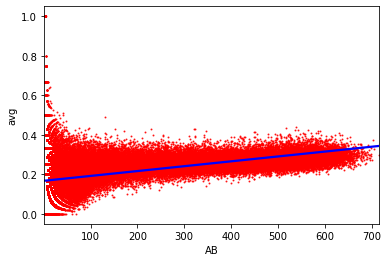

In [31]:
batting['avg'] = batting.H/batting.AB
sns.regplot(data=batting, x='AB', y='avg', marker='o', color='red', scatter_kws={'s':1}, line_kws={'color':'blue'})

In [33]:
batting = batting.dropna()
stats.pearsonr(batting.avg,batting.AB)

(0.3805391828161141, 0.0)

No, actually it's probably the opposite: you get more at-bats because you are a better hitter.

# T distribution

The t test computes t, which measures the spread between means. What are the chances that we re-sampled from a population and got the same value of t? This is what the p value is important for.

http://blog.minitab.com/blog/statistics-and-quality-data-analysis/what-are-t-values-and-p-values-in-statistics

In [ ]:
# t distribution
from scipy.stats import t
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

df = 2.74335149908
mean, var, skew, kurt = t.stats(df, moments='mvsk')
x = np.linspace(t.ppf(0.01, df), t.ppf(0.99, df), 100)
ax.plot(x, t.pdf(x, df), 'k-', lw=2, alpha=0.6, label='t pdf')
ax.set_title('t pdf')